# Visualizing trends in publishing delays

In [1]:
import gzip
import os
import datetime
import calendar

import pandas
import matplotlib
import seaborn
%matplotlib inline

/home/dhimmels/anaconda3/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


## Analysis for articles with receival, acceptance, and online publication dates

In [2]:
# Read the cleaned article date information
path = os.path.join('data', 'articles-filtered.tsv.gz')
filtered_df = pandas.read_table(path, parse_dates=[3, 4, 5, 6])
filtered_df.head(2)

,journal,journal_issn,pubmed_id,received,revised,accepted,date_online,acceptance_delay,publication_delay
0,Astrophys J,0004-637X,10727377,2000-01-04,nan,2000-02-22,2000-03-16,49,23
1,Astrophys J,0004-637X,10727379,2000-01-31,nan,2000-02-28,2000-03-16,28,17


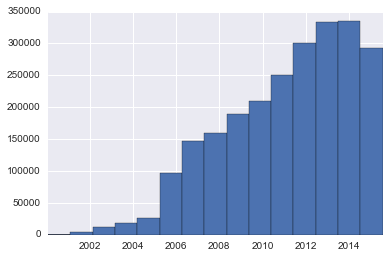

In [3]:
# Articles per year
ax = filtered_df.date_online.hist(bins=15)

In [4]:
def summarize(df):
    """Summarize delays over a dataframe"""
    row = pandas.Series()
    row['count'] = len(df)
    for column in 'acceptance_delay', 'publication_delay':
        if column in df.columns:
            row[column] = df[column].median()
    row['jounals'] = df.journal.nunique()
    return row

In [5]:
# Calculate year summaries
year_df = filtered_df.groupby(by=filtered_df.date_online.map(lambda date: date.year)).apply(summarize).reset_index()
year_df

,date_online,count,acceptance_delay,publication_delay,jounals
0,2000,823,40,34,30
1,2001,3668,81,58,120
2,2002,10861,103,61,190
3,2003,16476,102,58,253
4,2004,20244,103,51,526
5,2005,72106,103,52,867
6,2006,135032,99,45,1062
7,2007,149253,99,34,1243
8,2008,174114,100,30,1420
9,2009,195732,97,23,1610


In [6]:
# Calculate month summaries
# month_df = filtered_df.groupby(by=filtered_df.date_online.map(lambda date: date.month)).apply(summarize).reset_index()
# month_df

In [7]:
# Save year summaries
path = os.path.join('data', 'years.tsv')
year_df.to_csv(path, sep='\t', index=False)

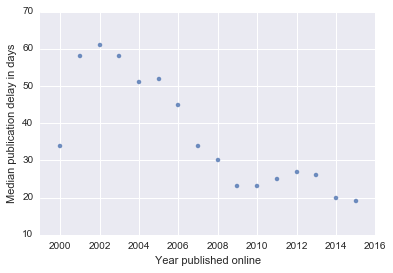

In [8]:
# Plot median publication delay versus online publication year
ax = seaborn.regplot('date_online', 'publication_delay', year_df, truncate=True, fit_reg=False)
matplotlib.pyplot.xlabel('Year published online');
matplotlib.pyplot.ylabel('Median publication delay in days');
matplotlib.pyplot.xlim(1999, 2016);

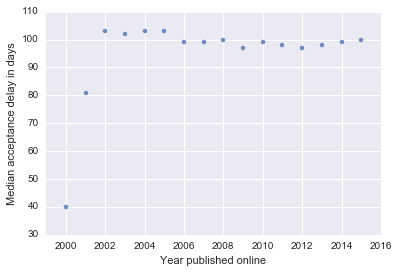

In [9]:
# Plot median acceptance delay versus online publication year
ax = seaborn.regplot('date_online', 'acceptance_delay', year_df, truncate=True, fit_reg=False)
matplotlib.pyplot.xlabel('Year published online');
matplotlib.pyplot.ylabel('Median acceptance delay in days');
matplotlib.pyplot.xlim(1999, 2016);

## Analysis for articles with receival and acceptance dates

In [10]:
# Read the cleaned article date information
path = os.path.join('data', 'articles-acceptance.tsv.gz')
acceptance_df = pandas.read_table(path, parse_dates=[3, 4, 5])
acceptance_df.head(2)

,journal,journal_issn,pubmed_id,received,revised,accepted,acceptance_delay
0,Arch Gerontol Geriatr,0167-4943,2416282,1985-01-25,1985-04-30,1985-05-02,97
1,Arch Gerontol Geriatr,0167-4943,2421656,1985-01-22,1985-09-18,1985-09-19,240


In [11]:
acceptance_df['year_accepted'] = acceptance_df.accepted.map(lambda date: date.year)
year_acc_df = acceptance_df.groupby('year_accepted').apply(summarize).reset_index()
year_acc_df

,year_accepted,count,acceptance_delay,jounals
0,1965,86,90.5,1
1,1966,191,60.0,1
2,1967,182,56.0,1
3,1968,225,61.0,1
4,1969,180,56.0,1
5,1970,187,66.0,3
6,1971,179,99.0,1
7,1972,185,61.0,2
8,1973,278,54.5,4
9,1974,339,67.0,3


## Analysis for journals that have deposited dates for every year of the specified period

In [12]:
start = 2000
end = 2014

In [13]:
year_mat = acceptance_df.pivot_table(values='acceptance_delay', index='journal', columns='year_accepted', aggfunc='count').fillna(0)

In [14]:
journal_list = (year_mat.loc[:, start:end] > 0).apply(all, 1)
journal_subset = journal_list.index[journal_list]
subset_df = acceptance_df[acceptance_df.journal.isin(journal_subset) &
              (acceptance_df.year_accepted >= start) &
              (acceptance_df.year_accepted <= end)]
short_df = subset_df.groupby('year_accepted').apply(summarize).reset_index()

In [15]:
short_df

,year_accepted,count,acceptance_delay,jounals
0,2000,2563,87,59
1,2001,4638,96,59
2,2002,5747,105,59
3,2003,6355,105,59
4,2004,6785,110,59
5,2005,8111,109,59
6,2006,8603,107,59
7,2007,9316,114,59
8,2008,10497,113,59
9,2009,10562,113,59
